# Data Preparation

In [1]:
import general_utils
import data_prepare_utils
import eda_utils
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

In [2]:
start = time.time()

## 1. Create a copy of train_df for data preparation

In [3]:
target = "label"

In [4]:
train_df = general_utils.read_csv("./data/train_df.csv")


Read CSV file ./data/train_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1641431,5177,1998,7,191,60,5,21,82,14,...,2,-1,-1,-1,2,-1,6,24,3,0
1,2021896,4628,4530,7,177,56,5,17,31,40,...,3,18,-1,-1,2,10^11^12^13^14^15^16^17^18^19^20^21^22^23,7,17,3,0
2,1790795,2709,1413,7,134,55,4,17,65,18,...,5,20,-1,-1,5,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,14,1,0
3,1216709,1949,6143,7,150,17,5,21,11,39,...,2,16,-1,-1,2,8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,36,3,0
4,1635521,4806,2176,7,206,64,5,15,22,39,...,4,20,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,36,1,0


df.shape: (838142, 36)


In [5]:
train_df_prep = train_df.copy()
del train_df

In [6]:
numerical_attr_list = []
numerical_attr_list

[]

In [7]:
categorical_attr_list = [attr for attr in train_df_prep.columns if attr not in numerical_attr_list and attr != target]
categorical_attr_list

['uid',
 'task_id',
 'adv_id',
 'creat_type_cd',
 'adv_prim_id',
 'dev_id',
 'inter_type_cd',
 'slot_id',
 'spread_app_id',
 'tags',
 'app_first_class',
 'app_second_class',
 'age',
 'city',
 'city_rank',
 'device_name',
 'device_size',
 'career',
 'gender',
 'net_type',
 'residence',
 'his_app_size',
 'his_on_shelf_time',
 'app_score',
 'emui_dev',
 'list_time',
 'device_price',
 'up_life_duration',
 'up_membership_grade',
 'membership_life_duration',
 'consume_purchase',
 'communication_onlinerate',
 'communication_avgonline_30d',
 'indu_name',
 'pt_d']

## 2. Identify required transformation

In this section, we check if any data transformation is needed based on the exploratory data analysis.
 

**2.1 Drop attributes - included**<br>

In [8]:
# Check eda.ipynb for detailed analysis for choosing attrs to drop
attrs_to_drop = ['app_score', 'his_on_shelf_time', 'task_id', 'spread_app_id', 'tags', 'dev_id', 'app_second_class', 'adv_prim_id', 'device_price']
attrs_to_drop

['app_score',
 'his_on_shelf_time',
 'task_id',
 'spread_app_id',
 'tags',
 'dev_id',
 'app_second_class',
 'adv_prim_id',
 'device_price']

**2.2 Feature scaling - included**<br>
standardize or normalize features: standardize.<br>
Standardization is useful when the algorithm assumes that the features are centered around zero, like in Ridge and Lasso regression. It can handle outliers better as it does not bound to a specific range. In contrast, normalization can be sensitive to outliers.

**2.3 Drop outliers - not included**<br>
Some of the data points are significantly different from the rest of dataset. However, considering them as outliers is not feasible.<br>
All attributes in this data set are pre-encoded and categorical, preventing us from understanding the context and investigating abnormal observations. Therefore, the process of dropping outliers is not included in this project.

**2.4 Fill/drop missingness - not included**<br>
No missing value is found in the data set. Therefore, this process is ignored.

**2.5 Discretize continuous features - not included**<br>
Data discretization is used to group continuous values into contiguous intevals. Many of the attributes in the original data set seem to be discretized already. 

**2.6 Decompose features - not included**<br>
No data set documentation is found when getting the data set and all attributes are pre-encoded. Therefore, decomposing these transformed features is unnecessary. 

**2.7 Transform features - not included**<br>
Based on the fact that all features are categorical, only target encoding is implement. Log transformation or square root transformation is unnecessary.

**2.8 Aggregate features into new features - not included**<br>
Because the original data set has be preprocessed already (probably for privacy consideration), the actual meanings of numerous values are unclear. It constrains our capacity to construct meaningful and useful features.<br>
For example, the feature **gender** has three groups of values - 2, 4, 3. We lack information to identify the actual gender.

## 3. Create a pipeline of transformer

In [9]:
train_df_prep = data_prepare_utils.drop_duplicate_obs(train_df_prep)


Drop duplicate observations:
df.shape:  (838142, 36)
drop_dup_df.shape:  (833795, 36)


In [10]:
numerical_transformer = Pipeline([
    ("column_dropper", data_prepare_utils.DropColumnsTransformer(attrs_to_drop)),
    ("scaler", StandardScaler())
])
numerical_transformer

Pipeline(steps=[('column_dropper',
                 DropColumnsTransformer(attrs_to_drop=['app_score',
                                                       'his_on_shelf_time',
                                                       'task_id',
                                                       'spread_app_id', 'tags',
                                                       'dev_id',
                                                       'app_second_class',
                                                       'adv_prim_id',
                                                       'device_price'])),
                ('scaler', StandardScaler())])

In [11]:
categorical_transformer = Pipeline([
    ("column_dropper", data_prepare_utils.DropColumnsTransformer(attrs_to_drop)),
    ("target_encoder", TargetEncoder(random_state=42)),
    ("scaler", StandardScaler())
])
categorical_transformer

Pipeline(steps=[('column_dropper',
                 DropColumnsTransformer(attrs_to_drop=['app_score',
                                                       'his_on_shelf_time',
                                                       'task_id',
                                                       'spread_app_id', 'tags',
                                                       'dev_id',
                                                       'app_second_class',
                                                       'adv_prim_id',
                                                       'device_price'])),
                ('target_encoder', TargetEncoder(random_state=42)),
                ('scaler', StandardScaler())])

In [12]:
preprocessor = ColumnTransformer([
    ("numerical", numerical_transformer, numerical_attr_list),
    ("categorical", categorical_transformer, categorical_attr_list)
])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('column_dropper',
                                                  DropColumnsTransformer(attrs_to_drop=['app_score',
                                                                                        'his_on_shelf_time',
                                                                                        'task_id',
                                                                                        'spread_app_id',
                                                                                        'tags',
                                                                                        'dev_id',
                                                                                        'app_second_class',
                                                                                        'adv_prim_id',
                                                                                        'device_price'])),
                                                 ('scaler', StandardScaler())]),
                                 []),
                                ('categorical',
                                 Pipeline(steps=[('column_dropper',
                                                  DropColumnsTransformer(at...
                                  'adv_prim_id', 'dev_id', 'inter_type_cd',
                                  'slot_id', 'spread_app_id', 'tags',
                                  'app_first_class', 'app_second_class', 'age',
                                  'city', 'city_rank', 'device_name',
                                  'device_size', 'career', 'gender', 'net_type',
                                  'residence', 'his_app_size',
                                  'his_on_shelf_time', 'app_score', 'emui_dev',
                                  'list_time', 'device_price',
                                  'up_life_duration', 'up_membership_grade',
                                  'membership_life_duration', ...])])

In [13]:
cap_x, y = train_df_prep.drop(columns=target), train_df_prep[target]
cap_x_transformed = preprocessor.fit_transform(cap_x, y)

## 4. EDA on transformed dataset

In [14]:
transformed_df = pd.DataFrame(cap_x_transformed, columns=[column for column in cap_x.columns if column not in attrs_to_drop])
transformed_df[target] = y.reset_index(drop=True)
del cap_x, y

In [15]:
eda_utils.check_out_general_info(transformed_df)


General information of DataFrame:
df.shape:
(833795, 27)
df.head():


,uid,adv_id,creat_type_cd,inter_type_cd,slot_id,app_first_class,age,city,city_rank,device_name,...,list_time,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,-0.234420,0.269338,0.491277,0.183077,-0.542126,-1.906517,-0.128911,0.387468,0.641769,1.121982,...,0.230468,1.021694,0.366804,0.005583,0.311123,5.672574,2.498244,-0.987814,-1.296470,0
1,0.181457,-0.694659,0.473148,0.180165,-0.253454,0.521003,-0.511085,-0.810074,-0.913338,0.536206,...,-0.040341,-0.269912,0.366060,0.003895,0.330629,0.859388,1.972604,0.640449,-0.872665,0
2,0.181457,-0.263245,0.493618,1.490727,-0.229145,0.531151,-0.479514,-0.787627,-0.868357,-0.264620,...,-0.692286,-1.027797,0.376913,0.002006,-1.350508,-0.284889,-0.507803,-0.541039,1.649677,0
3,-0.234420,-0.802140,0.493618,0.193170,-0.555835,0.531151,-0.685093,-0.963011,-0.868357,-0.092301,...,0.240292,0.570045,0.376913,0.002006,0.329908,-0.402829,0.037375,0.763268,-1.007081,0
4,-0.234420,0.572652,0.493618,0.193170,-1.075084,0.531151,-0.479514,-0.660634,0.622953,-0.922626,...,-1.006956,-1.027797,0.376913,0.002006,0.329908,-0.021983,0.037375,0.763268,1.649677,0


df.info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833795 entries, 0 to 833794
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   uid                          833795 non-null  float64
 1   adv_id                       833795 non-null  float64
 2   creat_type_cd                833795 non-null  float64
 3   inter_type_cd                833795 non-null  float64
 4   slot_id                      833795 non-null  float64
 5   app_first_class              833795 non-null  float64
 6   age                          833795 non-null  float64
 7   city                         833795 non-null  float64
 8   city_rank                    833795 non-null  float64
 9   device_name                  833795 non-null  float64
 10  device_size                  833795 non-null  float64
 11  career                       833795 non-null  float64
 12  gender                       833795 non-null  flo

None

df.describe: 


,uid,adv_id,creat_type_cd,inter_type_cd,slot_id,app_first_class,age,city,city_rank,device_name,...,list_time,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
count,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,...,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,8.337950e+05,833795.000000
mean,1.146740e-12,1.527000e-13,2.110952e-11,-1.417973e-11,-4.804665e-13,1.289028e-11,-5.906684e-12,3.417430e-12,-1.161717e-11,-8.494404e-13,...,6.368935e-12,-2.116087e-12,6.144987e-12,-1.374632e-10,-9.747626e-12,5.748169e-12,-6.505862e-12,-9.746196e-13,-1.576419e-11,0.034517
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.182553
min,-2.344204e-01,-1.237773e+00,-3.411577e+00,-2.514619e+00,-1.197866e+00,-1.906517e+00,-6.850932e-01,-4.751416e+00,-9.133378e-01,-3.384328e+00,...,-1.006956e+00,-2.275270e+00,-8.023609e+00,-2.209114e+01,-9.486422e+00,-4.560847e+00,-5.869769e-01,-3.021090e+00,-1.296470e+00,0.000000
25%,-2.344204e-01,-6.740555e-01,4.731478e-01,1.801647e-01,-6.563090e-01,5.210034e-01,-6.510223e-01,-6.536549e-01,-8.664626e-01,-7.505818e-01,...,-6.495938e-01,-9.931554e-01,3.501753e-01,2.006414e-03,2.949714e-01,-2.853139e-01,-1.762134e-01,-9.509744e-01,-1.007081e+00,0.000000
50%,-2.344204e-01,-3.130989e-01,4.778666e-01,1.874668e-01,-2.534537e-01,5.311512e-01,-2.300270e-01,-2.095786e-01,-2.819892e-01,-4.230756e-01,...,-1.037215e-01,-2.264715e-01,3.668039e-01,3.894966e-03,3.111235e-01,-6.585479e-02,-3.232413e-02,6.312839e-01,5.342103e-02,0.000000
75%,1.814570e-01,4.465355e-01,4.912766e-01,1.931700e-01,-1.385133e-04,5.353783e-01,-1.398657e-01,3.883488e-01,6.229527e-01,6.160576e-01,...,2.822888e-01,9.980192e-01,3.726535e-01,5.583228e-03,3.299076e-01,2.105198e-02,1.118300e-02,6.404493e-01,5.471109e-01,0.000000
max,1.181410e+01,3.473508e+01,1.130770e+00,1.725073e+00,1.825819e+00,5.376175e-01,8.993419e+00,1.034848e+01,7.947676e+00,9.506805e+00,...,1.185955e+01,6.933507e+00,5.867398e+00,6.178942e+02,3.306292e-01,1.279511e+02,1.568487e+01,4.512661e+00,2.047720e+00,1.000000


In [16]:
eda_utils.check_out_duplicate_obs(transformed_df)


Check out duplicate observations:
df.shape:  (833795, 27)
drop_dup_df.shape:  (833777, 27)
Caution: data set contains duplicate observations!!!



- There emerges a few new duplicate observations. This can be possible for the large dataset but with similar value range.
- After encoding, they can be encoded to the same value. We will not drop these few observations.


In [17]:
eda_utils.check_out_missing_target(transformed_df, target)


Check out observations with missing target:
df.shape:  (833795, 27)
drop_miss_tar_df.shape:  (833795, 27)
No missing-target observations observed in data set.


In [18]:
eda_utils.check_out_missingness(transformed_df)


Check out missingness:
No missing values in data set.


In [19]:
numerical_attr_list = [attr for attr in transformed_df.columns if attr != target]


Histogram plots for numerical attributes:


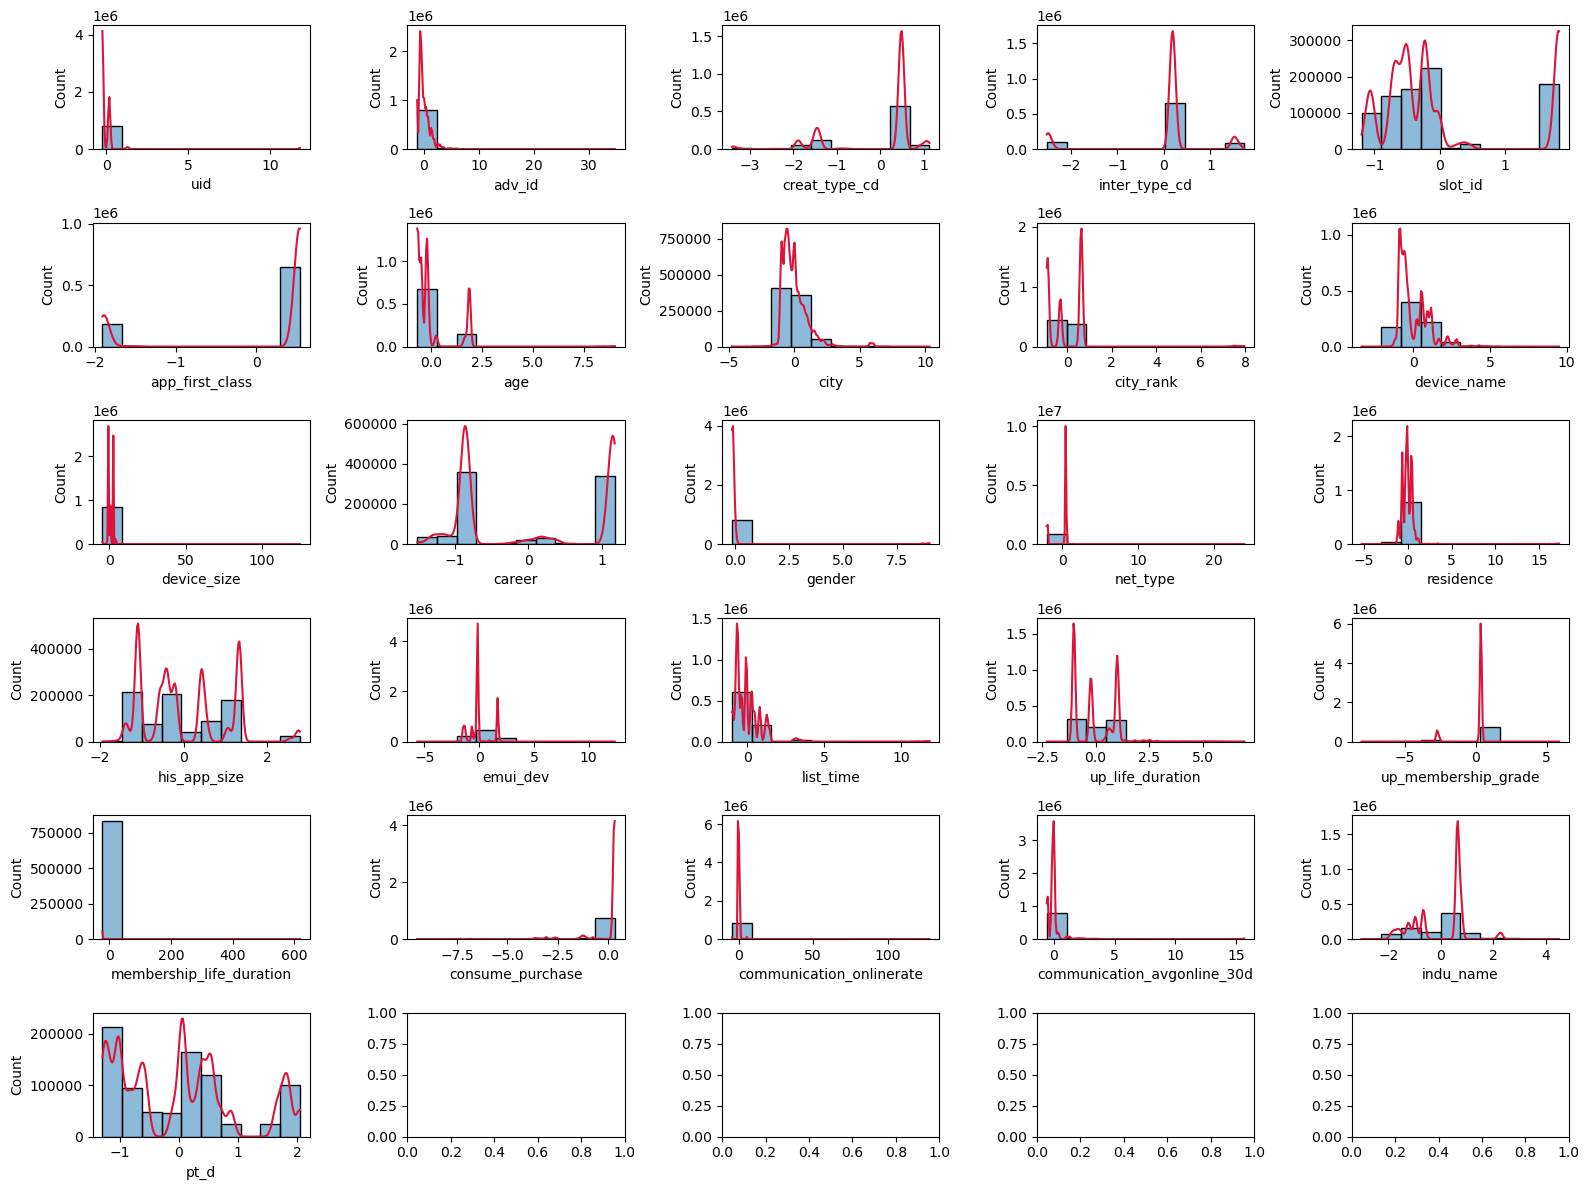

In [20]:
eda_utils.hist_plot_for_numerical(transformed_df, numerical_attr_list)

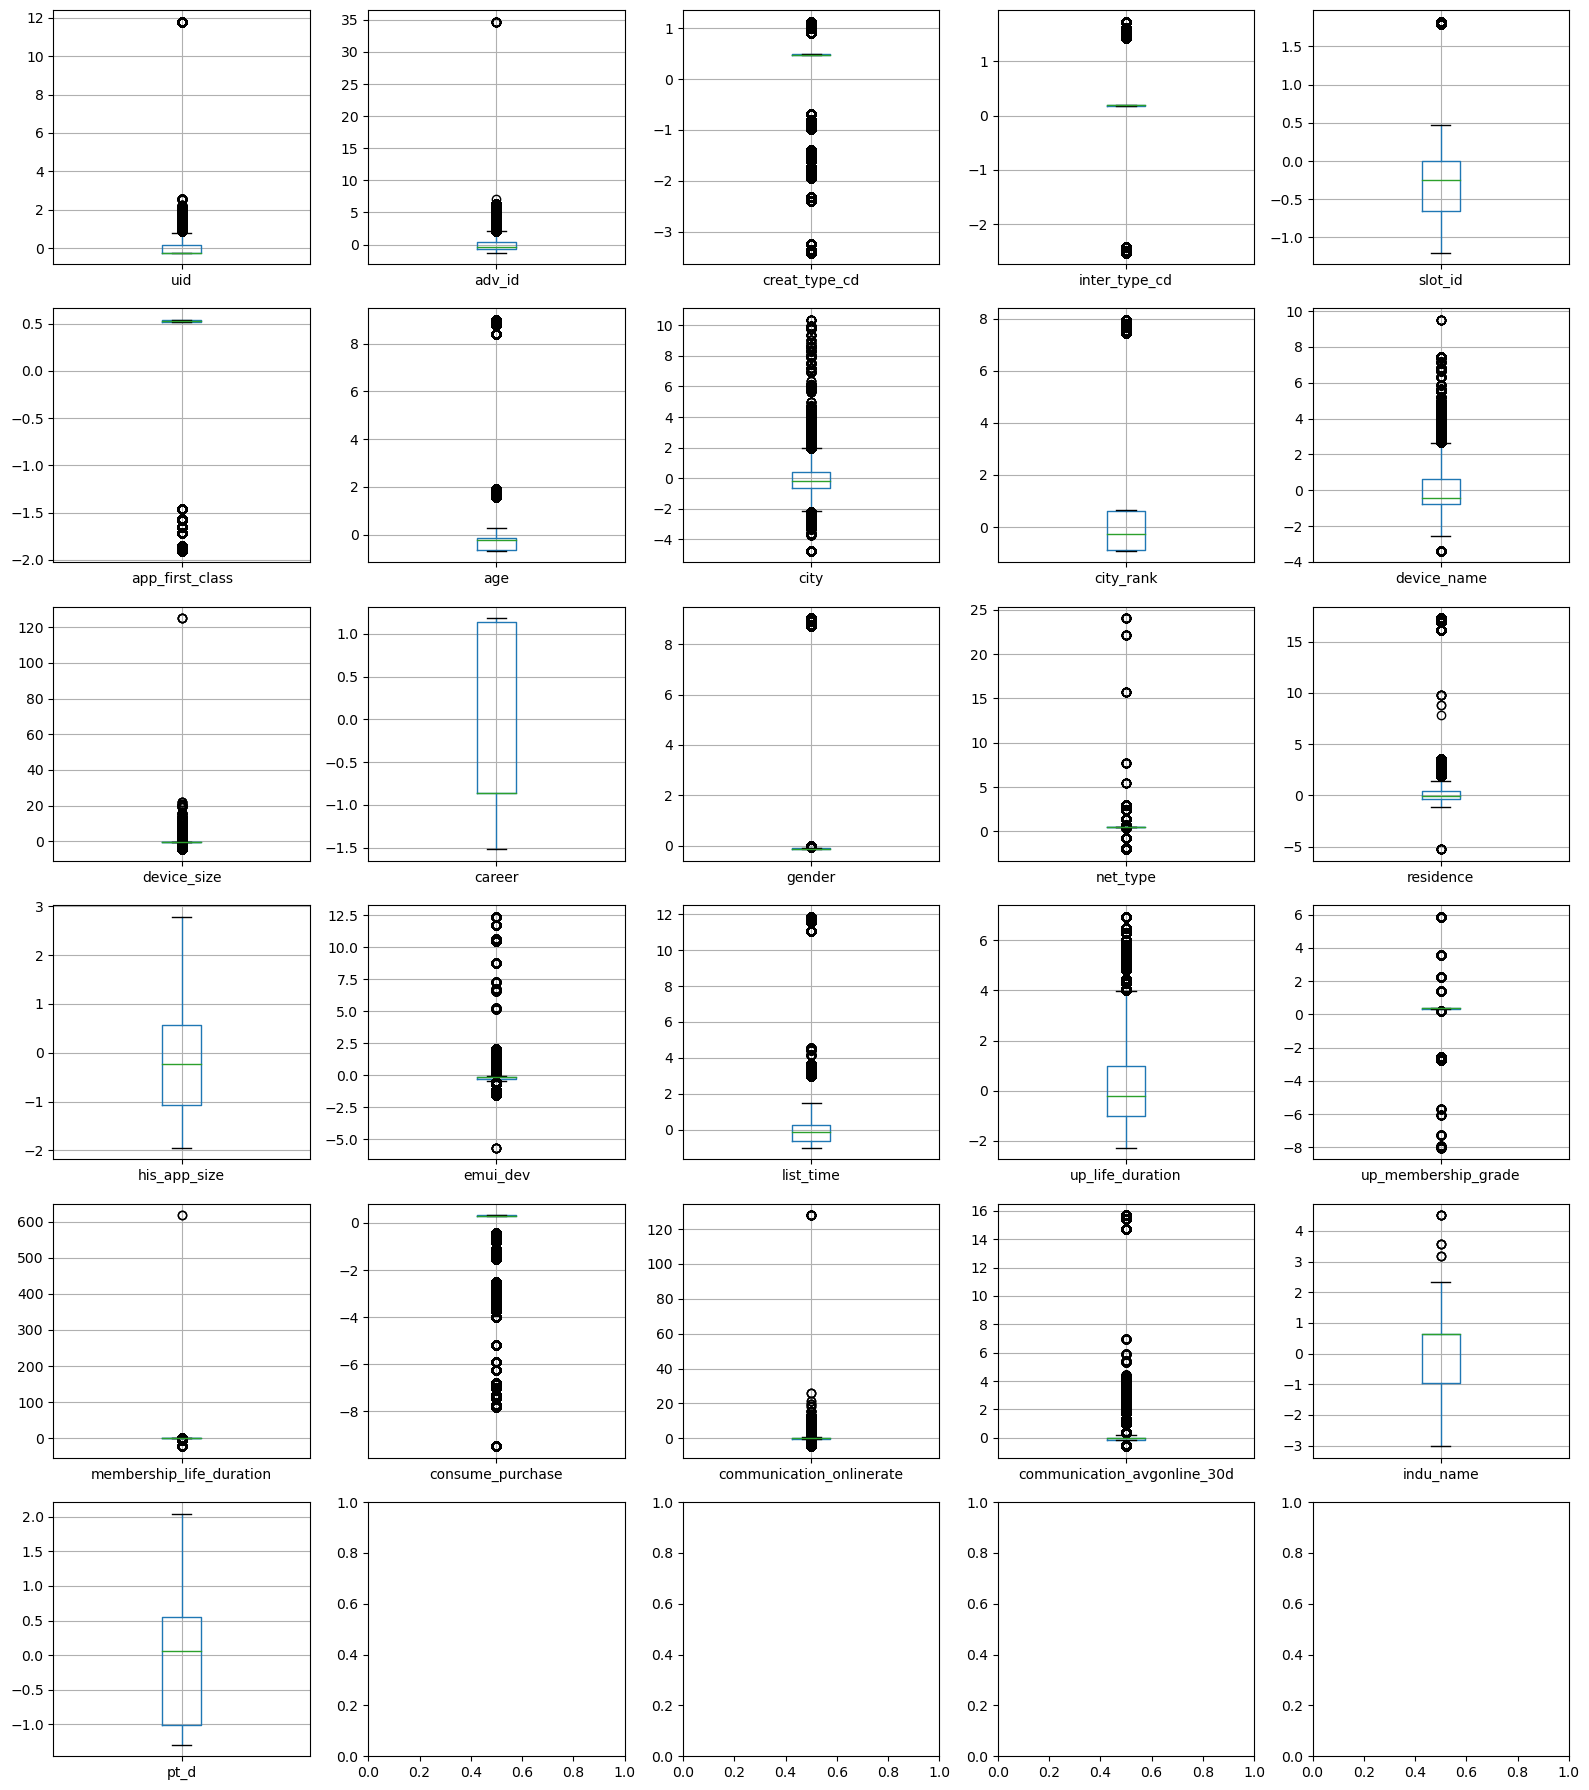

In [21]:
eda_utils.box_plot_for_numerical(transformed_df, numerical_attr_list)

In [22]:
eda_utils.tukeys_method_for_numerical(transformed_df, numerical_attr_list)


Implement Tukey's fences to identify outliers based on the Inter Quartile Range (IQR) method:


,Attribute,Outliers Prob Count,Outliers Prob Fraction,Outliers Poss Count,Outliers Poss Fraction
10,device_size,363035,0.435401,363890,0.436426
16,emui_dev,294556,0.353271,360135,0.431923
2,creat_type_cd,260334,0.312228,260334,0.312228
5,app_first_class,183892,0.220548,183892,0.220548
3,inter_type_cd,183765,0.220396,183765,0.220396
13,net_type,169724,0.203556,170334,0.204288
6,age,150420,0.180404,150420,0.180404
21,consume_purchase,103457,0.124080,103457,0.124080
19,up_membership_grade,101469,0.121695,101469,0.121695
12,gender,83805,0.100510,120719,0.144783



Heatmap visualizing correlation between numerical attributes:


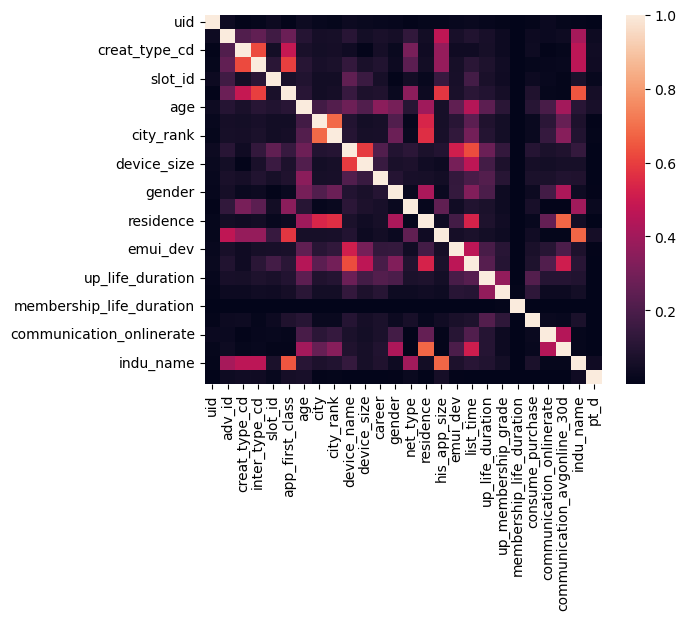


Matrix visualizing correlation (>0.5) between numerical attributes:


,correlation
city with city_rank,0.684963
residence with communication_avgonline_30d,0.677722
his_app_size with indu_name,0.676741
app_first_class with indu_name,0.645145
device_name with list_time,0.628226
creat_type_cd with inter_type_cd,0.621862
inter_type_cd with app_first_class,0.601278
device_name with device_size,0.591819
app_first_class with his_app_size,0.578999
city_rank with residence,0.559885


In [23]:
eda_utils.corr_for_numerical(transformed_df, numerical_attr_list)

In [24]:
eda_utils.print_vifs(transformed_df, numerical_attr_list)


Investigate multi co-linearity: calculate variance inflation factors (VIF):
Prepare DataFrame for vif calculation:
Added a bias term to the data frame to construct the design matrix for assessment of vifs.
Scale the attributes - but not the bias term


,attribute,vif
18,list_time,3.206713
15,residence,3.150175
10,device_name,2.758776
24,communication_avgonline_30d,2.532686
25,indu_name,2.527964
6,app_first_class,2.348937
16,his_app_size,2.199281
9,city_rank,2.110852
8,city,2.089742
4,inter_type_cd,2.077706


In [25]:
end = time.time()
print(f'Script run time: {(end - start)/60} minutes')

Script run time: 4.217508073647817 minutes
